(                  day    close      y_pred
 time                                      
 2024-08-14  Wednesday  162.165  161.979438
 2024-08-15   Thursday  163.731  162.187133
 2024-08-16     Friday  162.737  161.669133
 2024-08-19     Monday  162.631  161.960000
 2024-08-20    Tuesday  161.708  161.666733
 ...               ...      ...         ...
 2024-11-21   Thursday  161.382  162.187133
 2024-11-22     Friday  161.271  161.669133
 2024-11-25     Monday  161.232  161.960000
 2024-11-26    Tuesday  160.440  161.666733
 2024-11-27  Wednesday  159.336  161.979438
 
 [76 rows x 3 columns],
 <Axes: xlabel='day', ylabel='close'>)

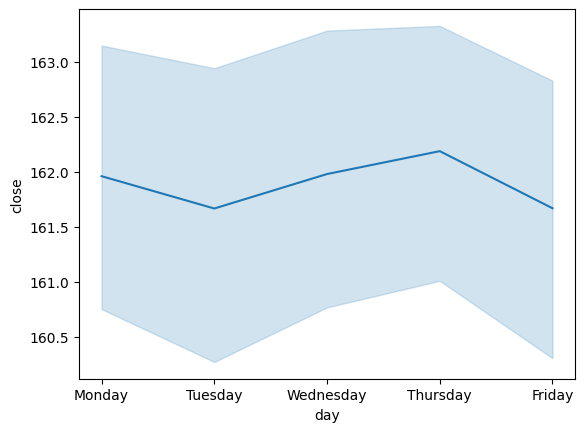

In [1]:
from models.seasonality.weekly import d1_timeframe

d1_timeframe(currency="EURJPY", years_back=0.25)